In [1]:
import torch
import torchvision.models
import hiddenlayer as hl
from unityagents import UnityEnvironment

In [2]:
import TD3
import mDDPG

In [3]:
def executable():
    return 'Tennis.app'

unity = UnityEnvironment(file_name=executable(), no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [4]:
brain = unity.brains['TennisBrain']
action_size = brain.vector_action_space_size
observation_space = brain.num_stacked_vector_observations * brain.vector_observation_space_size
observation_space, action_size

(24, 2)

In [5]:
model = TD3.TD3(observation_space, action_size, 1)

## TD3 actor network

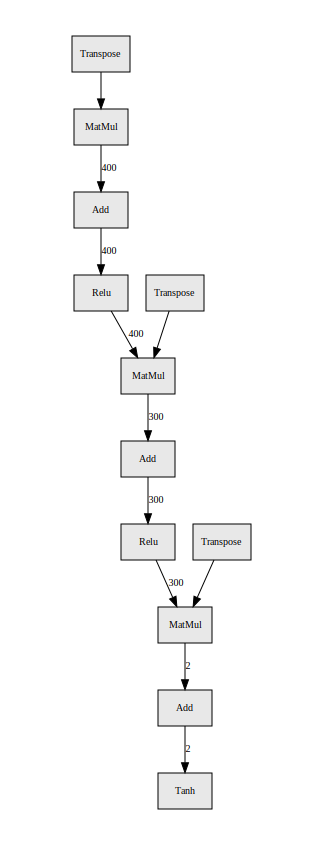

In [6]:
g1 = hl.build_graph(model.actor, torch.zeros(observation_space))
g1.build_dot().render('td3_actor', directory='.', format='png')
g1

## TD3 critic network

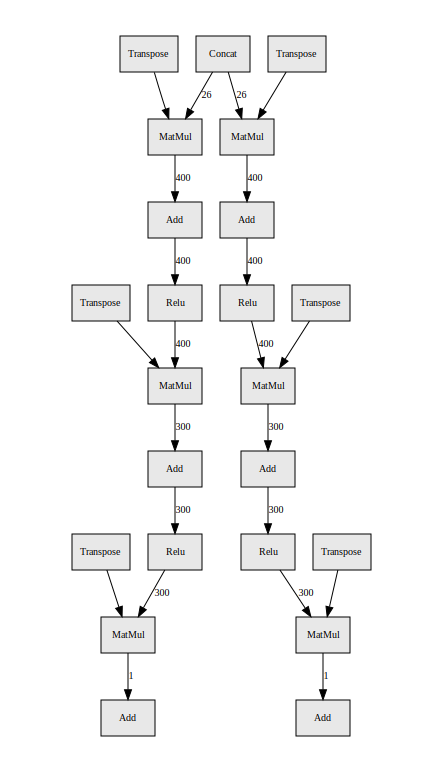

In [7]:
g2 = hl.build_graph(model.critic, args=(torch.ones(observation_space), torch.zeros(action_size)))
g2.build_dot().render('td3_critic', directory='.', format='png')
g2

## DDPG actor network

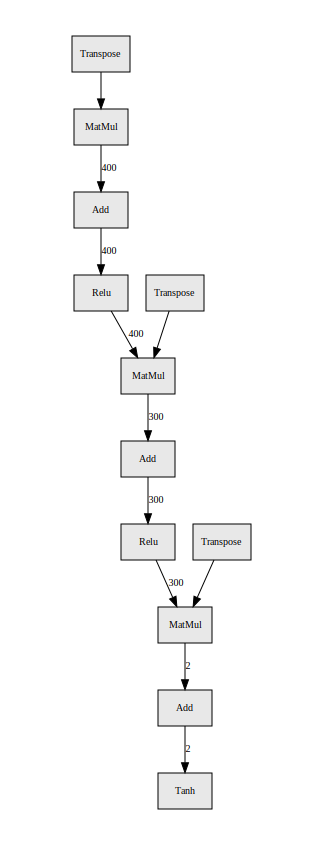

In [8]:
md = mDDPG.DDPG(observation_space, action_size, 1)
g3 = hl.build_graph(md.actor, torch.zeros(observation_space))
g3.build_dot().render('ddpg_actor', directory='.', format='png')
g3

## DDPG critic network

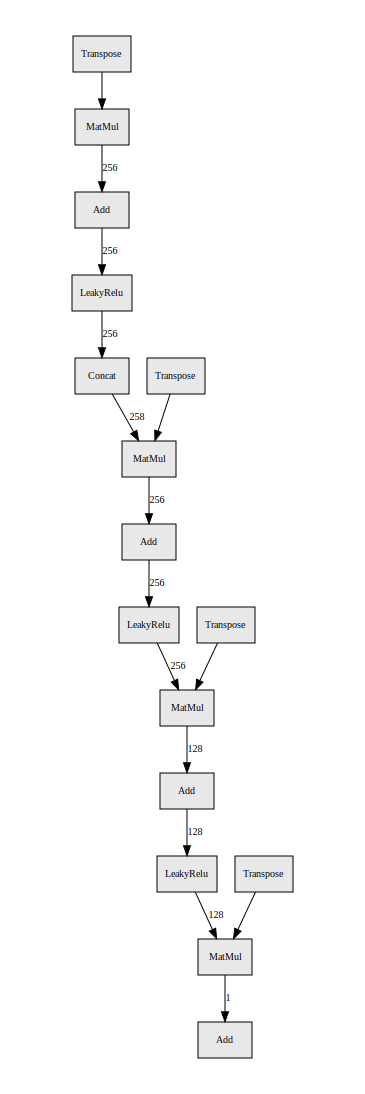

In [9]:
g4 = hl.build_graph(md.critic, args=(torch.zeros(observation_space), torch.zeros(action_size)))
g4.build_dot().render('ddpg_critic', directory='.', format='png')
g4